In [1]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install matplotlib

In [39]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [40]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [41]:
# The make_graph function has been modified to use Matplotlib for static graphs. Earlier, it used Plotly to generate interactive dashboards, which caused issues when uploading the notebook in the MARK assignment submission.



import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock):
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']

    fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

    # Stock price
    axes[0].plot(pd.to_datetime(stock_data_specific.Date), stock_data_specific.Close.astype("float"), label="Share Price", color="blue")
    axes[0].set_ylabel("Price ($US)")
    axes[0].set_title(f"{stock} - Historical Share Price")

    # Revenue
    axes[1].plot(pd.to_datetime(revenue_data_specific.Date), revenue_data_specific.Revenue.astype("float"), label="Revenue", color="green")
    axes[1].set_ylabel("Revenue ($US Millions)")
    axes[1].set_xlabel("Date")
    axes[1].set_title(f"{stock} - Historical Revenue")

    plt.tight_layout()
    plt.show()

In [42]:
import yfinance as yf

Tesla= yf.Ticker("TSLA")

In [43]:
tesla_data = Tesla.history(period='max')

In [44]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [45]:
import requests
url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'

In [46]:
!pip install html5lib

In [47]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

# Trouver le tableau dans la page
table = soup.find("tbody")
rows = table.find_all("tr")

tesla_revenue = []
for row in rows:
    cols = row.find_all("td")
    if len(cols) >= 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        tesla_revenue.append({"Date": date, "Revenue": revenue})

tesla_revenue = pd.DataFrame(tesla_revenue)

# Nettoyer les lignes vides
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]

print(tesla_revenue.shape)
tesla_revenue.head()

(13, 2)


,Date,Revenue
0,2021,53823
1,2020,31536
2,2019,24578
3,2018,21461
4,2017,11759


In [48]:
tesla_revenue

,Date,Revenue
0,2021,53823
1,2020,31536
2,2019,24578
3,2018,21461
4,2017,11759
5,2016,7000
6,2015,4046
7,2014,3198
8,2013,2013
9,2012,413


In [59]:
gme= yf.Ticker("GME")

In [60]:
gme_data = sym.history(period='max')

In [61]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [62]:
response1 = requests.get('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html')

In [63]:
html_data1 = response1.text
soup1 = BeautifulSoup(html_data1,'html.parser')

In [64]:

# Trouver le tableau dans la page
table = soup1.find("tbody")
rows = table.find_all("tr")

gme_revenue = []
for row in rows:
    cols = row.find_all("td")
    if len(cols) >= 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        gme_revenue.append({"Date": date, "Revenue": revenue})

gme_revenue = pd.DataFrame(gme_revenue)

# Nettoyer les lignes vides
gme_revenue.dropna(inplace=True)

gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]

print(gme_revenue.shape)
gme_revenue.tail()

(16, 2)


,Date,Revenue
11,2009,8806
12,2008,7094
13,2007,5319
14,2006,3092
15,2005,1843


In [65]:
gme_revenue

,Date,Revenue
0,2020,6466
1,2019,8285
2,2018,8547
3,2017,7965
4,2016,9364
5,2015,9296
6,2014,9040
7,2013,8887
8,2012,9551
9,2011,9474


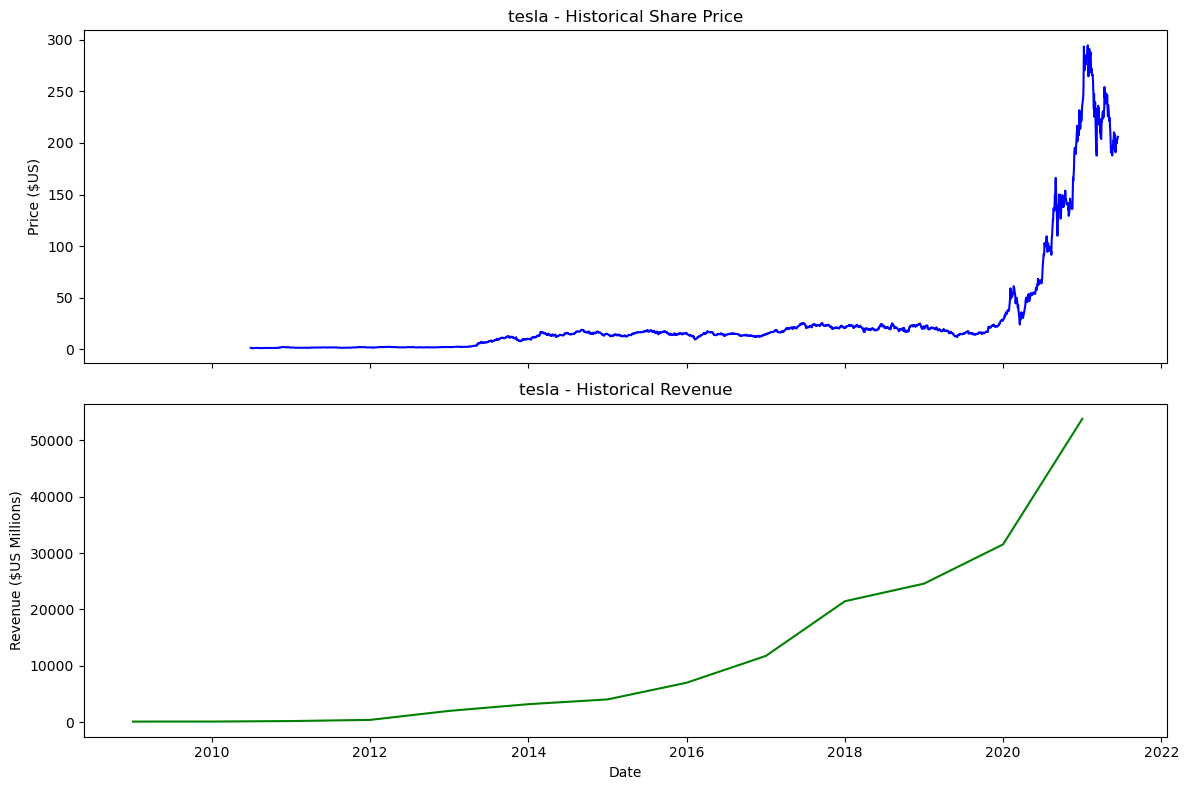

In [66]:
make_graph(tesla_data,tesla_revenue,'tesla')

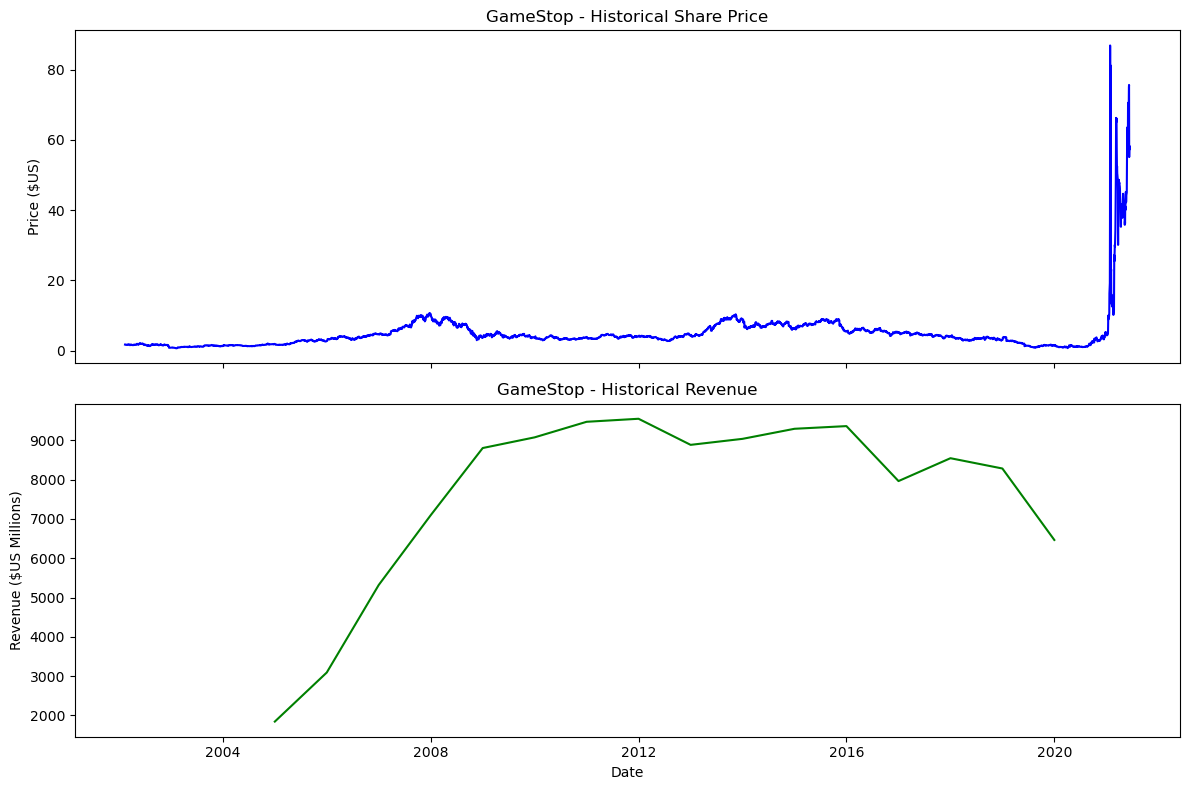

In [67]:
make_graph(gme_data,gme_revenue,'GameStop')